In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import sklearn.naive_bayes
import pickle
from astropy.stats import median_absolute_deviation
from scipy import signal
%matplotlib inline

In [ ]:
X_train = pd.read_table('hapt_data/Train/X_train.txt', sep=' ',header=None)
y_train = pd.read_table('hapt_data/Train/y_train.txt', sep=' ',header=None)
X_test = pd.read_table('hapt_data/Test/X_test.txt', sep=' ',header=None)
y_test = pd.read_table('hapt_data/Test/y_test.txt', sep=' ',header=None)
with open('hapt_data/features.txt', 'r') as f:
        feature_labels = list(map(str.strip, f.readlines()))
X_train.columns = feature_labels
X_test.columns = feature_labels

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
est = RandomForestClassifier(n_estimators=20)

In [ ]:
est.fit(X_train, y_train)
est.score(X_test, y_test)

In [ ]:
test = pd.read_table('hapt_data/Train/X_train.txt', sep=' ',header=None)

In [ ]:
y_train = pd.read_table('hapt_data/Train/y_train.txt', sep=' ',header=None)


In [ ]:
y_train

In [ ]:
est = SVC()

In [ ]:
est.fit(X_train, y_train)

In [ ]:
est.score(X_test, y_test)

In [ ]:
pca = PCA(400)

In [ ]:
pca.fit(X_train)
X_train_pca =  pca.transform(X_train)
est.fit(X_train_pca, y_train)

pca.fit(X_test)
X_test_pca = pca.transform(X_test)
est.score(X_test_pca, y_test)

In [ ]:
est.fit(X_train, y_train)
est.score(X_test, y_test)

In [ ]:
est_rf = RandomForestClassifier(n_estimators=100)

In [ ]:
est_rf.fit(X_train, y_train)

In [ ]:
est_rf.score(X_test, y_test)

In [ ]:
importance = list(zip(feature_labels, est_rf.feature_importances_))

In [ ]:
sorted(importance, key=lambda x: x[1])

In [ ]:
X_train

In [ ]:
est = sklearn.naive_bayes.GaussianNB()

In [ ]:
est.fit(X_train, y_train)

In [ ]:
est.score(X_test, y_test)

# Loading Raw Data

In [85]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import sklearn.naive_bayes
from scipy import signal
import pickle
from astropy.stats import median_absolute_deviation
import scipy.signal as signal
%matplotlib inline

In [86]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

from scipy import signal


In [87]:
path = 'hapt_data/RawData/'
files = os.listdir(path)
files = [x for x in files if 'user' in x]
file_paths = [path + x for x in files]

In [88]:
df_labels = pd.read_table(path + 'labels.txt', sep =' ')

In [89]:
file_paths.sort()

In [90]:
file_paths_acc = [x for x in file_paths if 'acc' in x]
file_paths_gyro = [x for x in file_paths if 'gyro' in x]
file_paths_acc.sort()
file_paths_gyro.sort()
file_list_zipped = list(zip(file_paths_acc, file_paths_gyro))

In [91]:
df_list = []
for acc,gyro in file_list_zipped:
    df_acc = pd.read_table(acc, sep=' ', header=None)
    df_gyro = pd.read_table(gyro, sep=' ', header=None)
    df_acc.columns = ['x','y','z']
    df_gyro.columns = ['gx','gy','gz']
    df = pd.concat([df_acc, df_gyro], axis=1)
    
    user = int(re.findall('user(\d\d)', acc)[0])
    exp = int(re.findall('exp(\d\d)', acc)[0])
    df['usr'] = user
    df['exp'] = exp
    df['act'] = 0
    df_act_label = df_labels[(df_labels['exp_id'] == exp) & (df_labels['user_id'] == user)]
    for e in df_act_label.iterrows():
        df.loc[int(e[1].start): int(e[1].end),'act'] = e[1].act_id
    df_list.append(df)

In [92]:
dft = pd.concat(df_list)
# Only observations with an activity
#dft = dft[dft.act.apply(lambda x: x in [1,2,3,4,5,6,7,8,9,10,11,12]) ]
#dft_y = dft.act

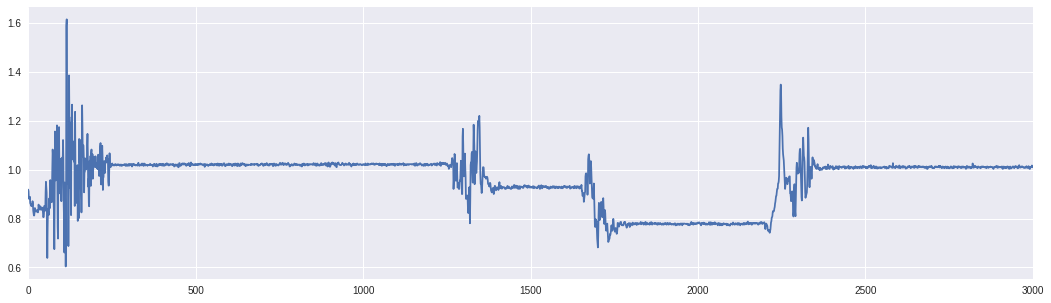

In [103]:
fig,ax = plt.subplots(figsize=(18,5))
dft.x[:3000].plot(ax=ax)

In [104]:
# Pickle raw data
pickle.dump( dft, open( "dft.p", "wb" ) )

In [ ]:
freq = dft_y.value_counts()

In [ ]:
freq.apply(lambda x: x/dft_y.size)

1 WALKING           
2 WALKING_UPSTAIRS  
3 WALKING_DOWNSTAIRS
4 SITTING           
5 STANDING          
6 LAYING            
7 STAND_TO_SIT      
8 SIT_TO_STAND      
9 SIT_TO_LIE        
10 LIE_TO_SIT        
11 STAND_TO_LIE      
12 LIE_TO_STAND      

# Visualizations

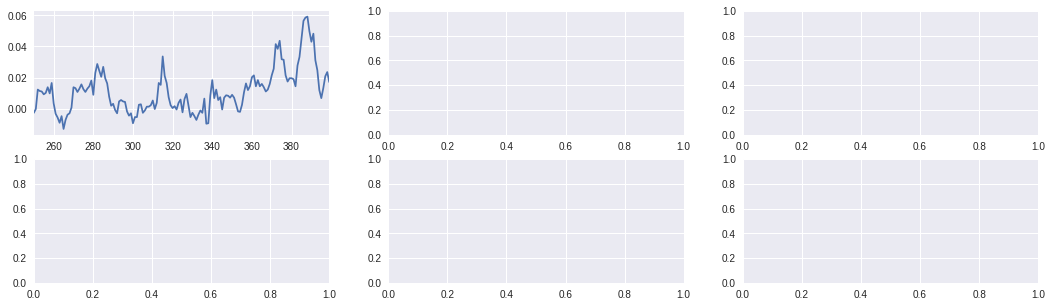

In [81]:
fig, ax = plt.subplots(2,3, figsize=(18,5))
person, activity = 1,5
dft[(dft.act == activity) & (dft.usr == person)][:150].gx.plot(ax=ax[0,0])

In [105]:
person, activity = 1,1
test_signal = dft[(dft.act == activity) & (dft.usr == person)][:3000]

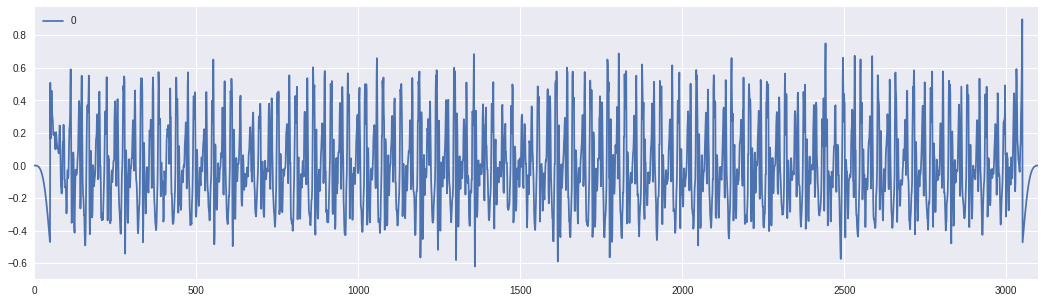

In [112]:
new_signal = hpf(test_signal.x)
passed_signal = pd.DataFrame(new_signal)
fig,ax = plt.subplots(figsize=(18,5))
passed_signal.plot(ax=ax)

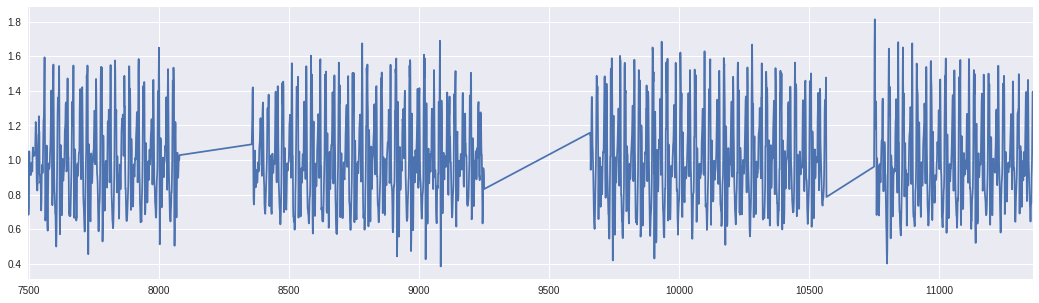

In [106]:
fig, ax = plt.subplots(figsize=(18,5))
test_signal['x'].plot(ax=ax)

# Extra Signals
acc mag (x,y,z)
acc jerk
acc jerk mag
gyro jerk
gyro mag(x,y,z)

# Pre-Process Signal

In [77]:
def hpf(signal, fc = 0.0025, b = 0.001):
    N = 100
    if not N % 2: N += 1
    n = np.arange(N)

    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = np.blackman(N)
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    # reverse function
    sinc_func = -sinc_func
    sinc_func[(N - 1) // 2] += 1

    s = signal
    return np.convolve(s, sinc_func)

# Initialize variables

In [2]:
# Initialize variables
window_size = 125
features = ['x', 'y', 'z', 'gx', 'gy', 'gz']
non_features = ['usr', 'act', 'exp']
feat_prefix = 'mean std max min mad'.split()
feat_dict = {}

In [3]:
def apply_features(*code):
    for step in code:
        for f, v in feat_dict.items():
            expression = 'feat_dict["{}"]'.format(f) + step
            print(expression)
            feat_dict[f] = eval(expression)

# Signal Processing

## Median Filter

In [168]:
cols = dft.drop(['act', 'usr', 'exp'], axis=1).columns
for col in cols:
    dft[col] = signal.medfilt(dft[col])
    print('{} done'.format(col))

x done
y done
z done
gx done
gy done
gz done


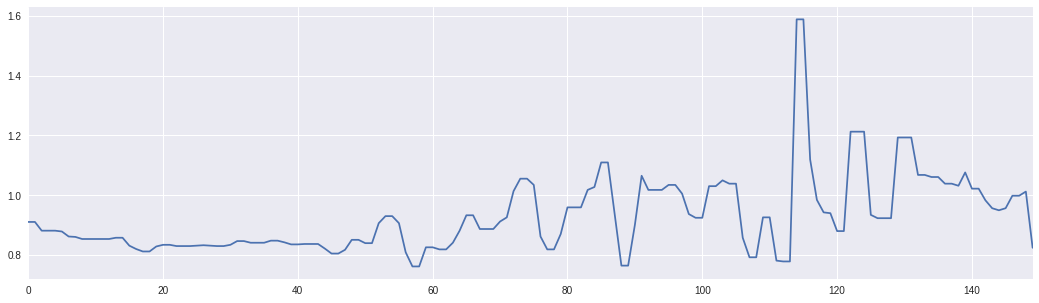

In [119]:
dft.x[:150].plot(figsize=(18,5))

## High-pass Filter

In [202]:
# Remove gravity component
N  = 3    # Filter order
Wn = 0.005 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba', btype='highpass')
 
# Second, apply the filter
cols = dft.drop(['act', 'usr', 'exp'], axis=1).columns
for col in cols:
    dft[col] = signal.filtfilt(B,A, dft[col])
    print('{} done'.format(col))

x done
y done
z done
gx done
gy done
gz done


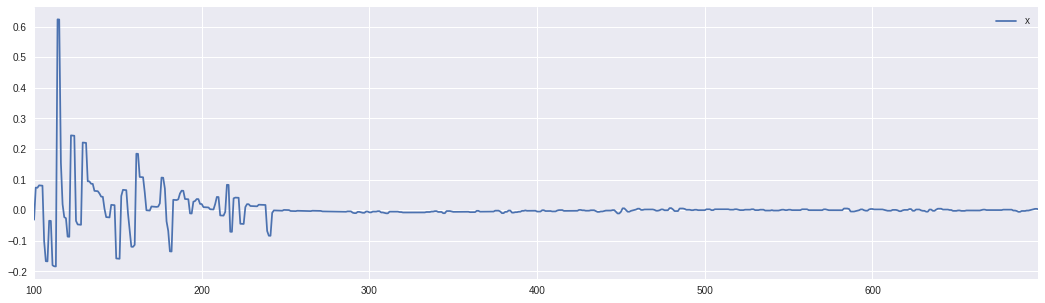

In [205]:
pd.DataFrame(dft.x)[100:700].plot(figsize=(18,5))

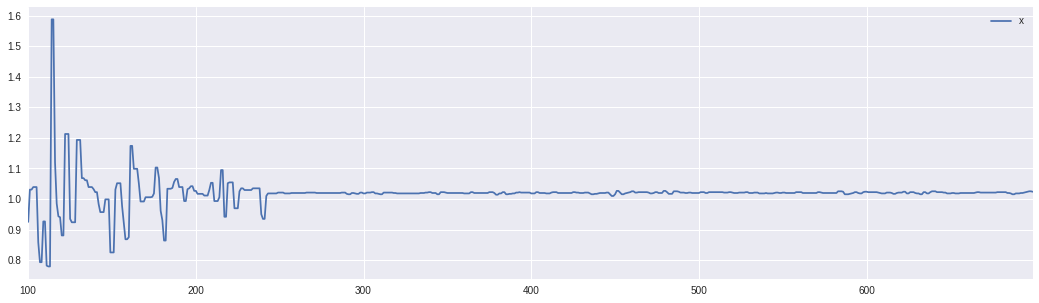

In [195]:
pd.DataFrame(dft.x)[100:700].plot(figsize=(18,5))

## Low Pass Filter

In [210]:
# Remove noise
# Human frequency max around 200 hz
N  = 3    # Filter order
Wn = 0.4 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba', btype='lowpass')
 
# Second, apply the filter
cols = dft.drop(['act', 'usr', 'exp'], axis=1).columns
for col in cols:
    dft[col] = signal.filtfilt(B,A, dft[col])
    print('{} done'.format(col))

x done
y done
z done
gx done
gy done
gz done


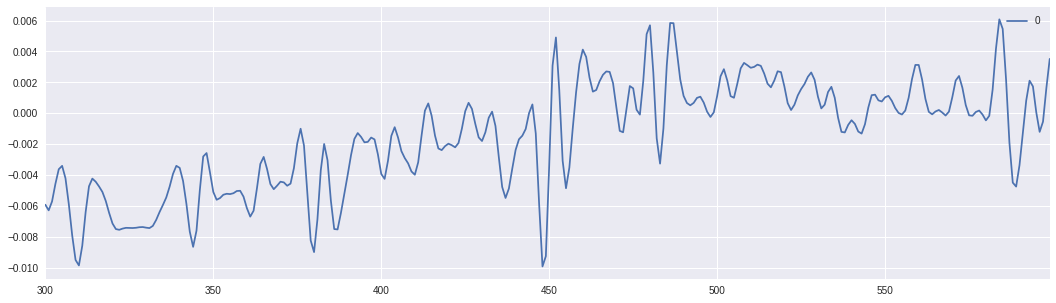

In [207]:
pd.DataFrame(tempf)[300:600].plot(figsize=(18,5))

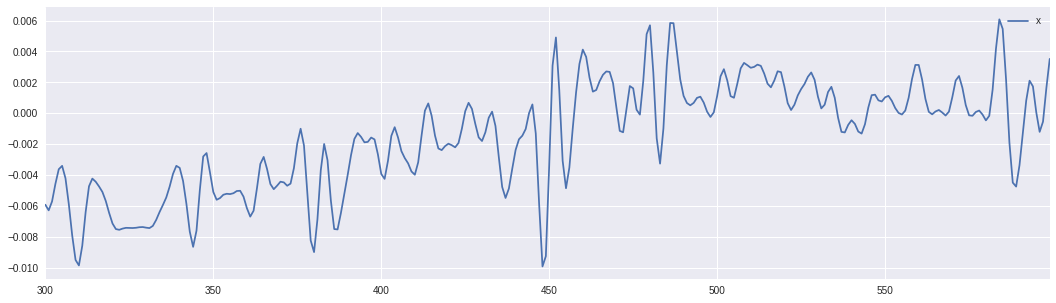

In [211]:
pd.DataFrame(dft.x)[300:600].plot(figsize=(18,5))


# Generate Extra Signals

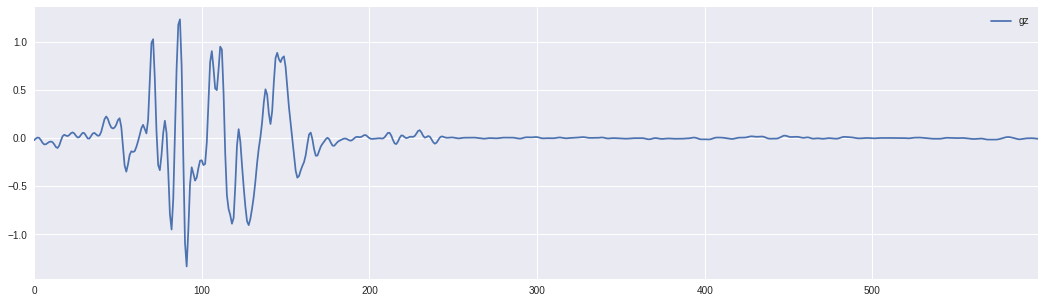

In [220]:
# AccMag
def mag(row):
    pass
dft['xyz_mag'] = 

In [213]:
# GyroMag

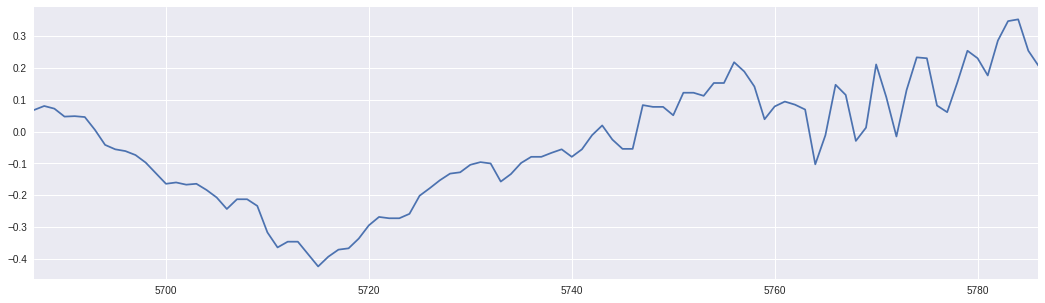

In [45]:
fig,ax = plt.subplots(figsize=(18,5))
activity, person = 9,5
test_signal = dft[(dft.act == activity) & (dft.usr == person)][0:100]
test_signal.z.plot(ax=ax)

# Generate Features

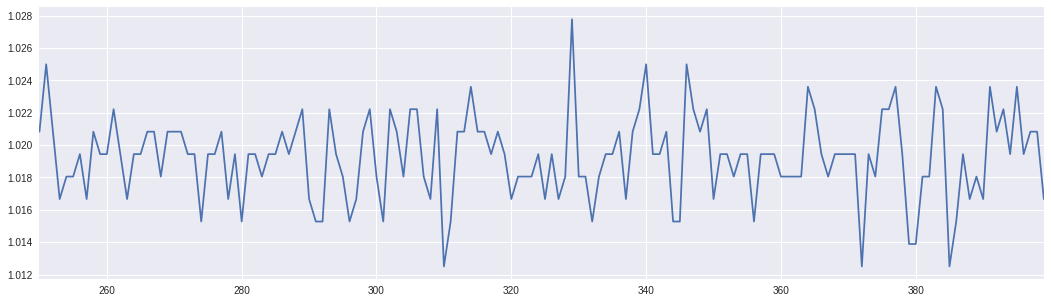

In [74]:
person, activity = 1,5
test_signal = dft[(dft.act == activity) & (dft.usr == person)][0:150]
fig,ax = plt.subplots(figsize=(18,5))
test_signal.x.plot()

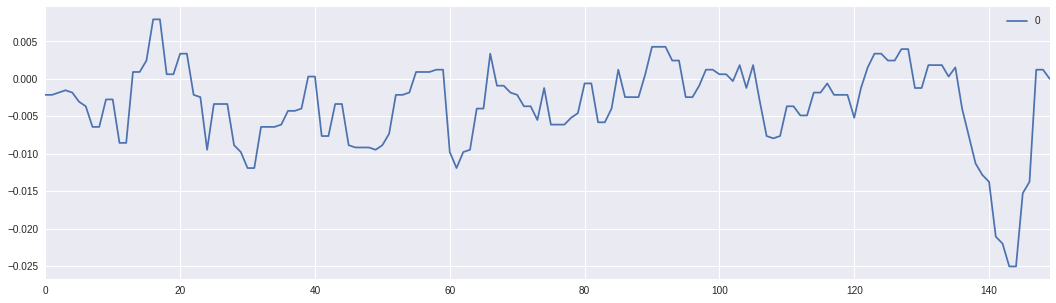

In [75]:
signal_median = pd.DataFrame(signal.medfilt(test_signal.gy))
fig,ax = plt.subplots(figsize=(18,5))
signal_median.plot(ax=ax)

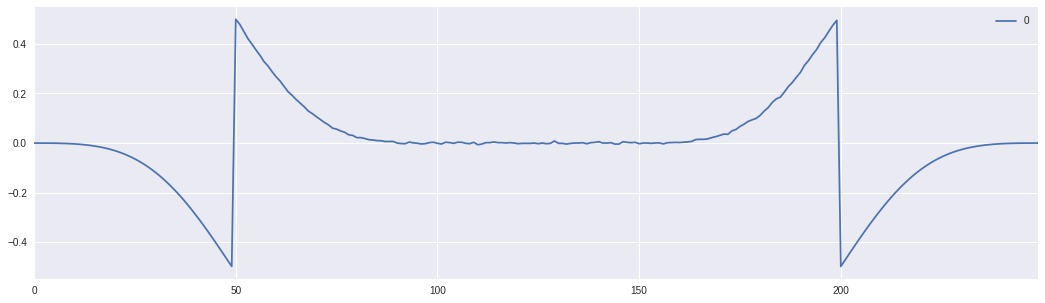

In [83]:
signal_hpf = pd.DataFrame(hpf(test_signal.x))
fig,ax = plt.subplots(figsize=(18,5))
signal_hpf.plot(ax=ax)

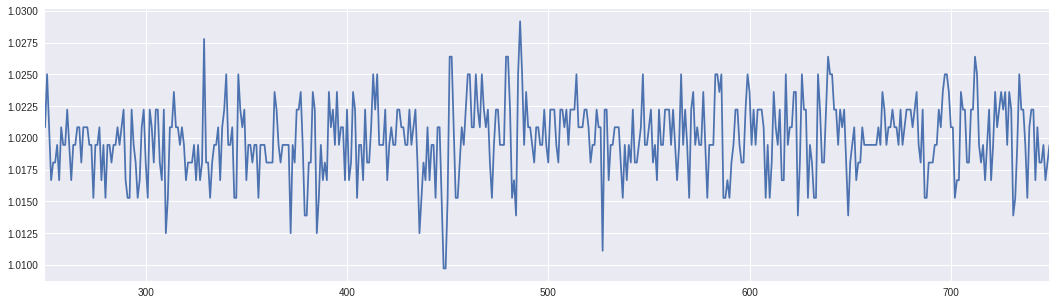

In [73]:
fig,ax = plt.subplots(figsize=(18,5))
test_signal.x.plot(ax=ax)

In [131]:
# Create mean and std features
dft_mean = dft.groupby(['usr', 'exp','act']).rolling(window_size).apply(np.mean)
dft_std = dft.groupby(['usr', 'exp','act']).rolling(window_size).apply(np.std)

KeyboardInterrupt: 

In [ ]:
# Fix dataframes
dft_mean.drop(non_features, axis=1, inplace=True)
dft_std.drop(non_features, axis=1, inplace=True)
dft_mean.columns = ['mean_' + x for x in dft_mean.columns]
dft_std.columns = ['std_' + x for x in dft_std.columns]

In [ ]:
# Create min and max features
dft_max = dft.groupby(['usr', 'exp','act']).rolling(window_size).apply(np.amax)
dft_min = dft.groupby(['usr', 'exp','act']).rolling(window_size).apply(np.amin)

In [ ]:
# Fix dataframes
dft_max.drop(non_features, axis=1, inplace=True)
dft_min.drop(non_features, axis=1, inplace=True)
dft_max.columns = ['max_' + x for x in dft_max.columns]
dft_min.columns = ['min_' + x for x in dft_min.columns]

In [ ]:
# Create mad feature
dft_mad = dft.groupby(['usr', 'exp','act']).rolling(window_size).apply(median_absolute_deviation)

In [ ]:
# Fix dataframes
dft_mad.drop(non_features, axis=1, inplace=True)
dft_mad.columns = ['mad_' + x for x in dft_max.columns]

In [12]:
non_nan_index = feat_dict['min'].dropna().reset_index().min_x.index

In [71]:
non_nan_index = feat_dict['min'].reset_index(drop='False').min_x[feat_dict['min'].reset_index(drop='False').min_x.isnull()].index


In [ ]:
'''Additional features to create'''
# include sma(): Signal magnitude area, meanFreq():, iqr(): energy():

# Save data

In [108]:
# Pickle processed features
#for feat in feat_prefix:
#    pickle.dump( dft_mean, open( "{}.p".format(feat), "wb" ) )

pickle.dump( dft, open( "dft.p", "wb" ) )
pickle.dump( non_nan_index, open( "non_nan_index.p", "wb" ) )

# Load data

In [116]:
# Load processed features
for feat in feat_prefix:
    feat_dict[feat] = pickle.load( open( "{}.p".format(feat), "rb" ) )
    
# Load non_nan_index
non_nan_index = pickle.load( open( "non_nan_index.p", "rb" ) )

# Load raw data
dft = pickle.load( open( "dft.p", "rb" ) )
dft_main = dft[dft.act.apply(lambda x: x in [1,2,3,4,5,6])]
dft_main.iloc[non_nan_index] = np.nan



/home/jvheeswijck/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Adjust window

In [56]:
# Adjust how much the windows overlap. 150 is no overlap, 1 is complete overlap
overlap = 75
apply_features('[::overlap]')
dft_main = dft_main[::overlap]

feat_dict["mean"][::overlap]
feat_dict["std"][::overlap]
feat_dict["max"][::overlap]
feat_dict["min"][::overlap]
feat_dict["mad"][::overlap]


# Drop NaNs

In [38]:
dft_main.dropna(inplace=True)
apply_features('.dropna()')

feat_dict["mean"].dropna()
feat_dict["std"].dropna()
feat_dict["max"].dropna()
feat_dict["min"].dropna()
feat_dict["mad"].dropna()


/home/jvheeswijck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
feat_dict["mad"].shape

(9264, 6)

In [58]:
dft_main.shape

(9264, 9)

# Create and Evaluate Models

# More Visuals

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(18,5))
person, activity = 2,5
X[(y.act == activity) & (dft.usr == person)][:150].gx.plot(ax=ax[0,0])

In [59]:
# Create X and y DataFrames
X = pd.concat([v for _,v in feat_dict.items()], axis=1)
X = X.reset_index(drop=True)
dft_r = dft_main.drop(non_features, axis=1).reset_index(drop=True)
X = pd.concat([dft_r, X], axis=1)
y = dft_main['act']


In [60]:
X.shape

(9264, 36)

In [61]:
y.shape

(9264,)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Random Forest

In [29]:
# Random-Forest Train/Test Split
est = RandomForestClassifier(n_estimators=10)
est.fit(X_train, y_train)
est.score(X_test, y_test)

0.85088293001962068

In [45]:
# Random-Forest Cross-Val
est = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(est, X, y, n_jobs=8, cv=10)
sum(scores)/len(scores)

0.73637797711075159

In [63]:
# Random-Forest Cross-Val
est = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(est, X, y, n_jobs=8, cv=10)
sum(scores)/len(scores)

0.74776023422389259

# SGD

In [31]:
# SGD Train-Test Split
est = SGDClassifier()
est.fit(X_train, y_train)
est.score(X_test, y_test)

0.72269457161543493

In [35]:
# SGD Model
est = SGDClassifier()
scores = cross_val_score(est, X, y, n_jobs=8, cv=10)
sum(scores)/len(scores)

0.70125845595529157

# K-Nearest Neighbors

In [33]:
# KNN Train-Test
est = KNeighborsClassifier(n_neighbors=5)
est.fit(X_train, y_train)
est.score(X_test, y_test)

0.81458469587965987

In [34]:
# KNN Cross-Val
est = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(est, X, y, n_jobs=8, cv=10)
sum(scores)/len(scores)

0.74358330128714889

# Support Vector Machines

In [27]:
# SVC
est = LinearSVC()
est.fit(X_train, y_train)
est.score(X_test, y_test)

0.76586003924133417

In [28]:
# SVC Cross-Val
est = LinearSVC()
scores = cross_val_score(est, X, y, n_jobs=8, cv=10)
sum(scores)/len(scores)

0.73785322809395404

In [ ]:
# Naive Bayes

In [ ]:
print(classification_report(y_test, est.predict(X_test)))